In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abhijitdahatonde/swiggy-restuarant-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\SAGA\.cache\kagglehub\datasets\abhijitdahatonde\swiggy-restuarant-dataset\versions\1


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

In [3]:
df=pd.read_csv("swiggy.csv")
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [4]:
### Count Restaurants

In [5]:
df["Restaurant"].nunique()

7865

In [6]:
### Find Maximum Price:

In [7]:
df["Price"].max()

np.float64(2500.0)

In [8]:
### Average Ratings

In [9]:
df["Avg ratings"].mean().round(2)

np.float64(3.66)

In [10]:
### Total Ratings:

In [11]:
df["Avg ratings"].sum().round(2)

np.float64(31726.3)

In [12]:
#### Food Type Count

In [13]:
df["Food type"].str.split(",",expand=True).stack().nunique()

601

In [14]:
## Medium Questions

In [15]:
## City Analysis:

In [16]:
cities_max_restaurant=df.groupby("City")["Restaurant"].count().reset_index(name="No_of _restaurant").sort_values(by="No_of _restaurant",ascending=False)
cities_max_restaurant.head(3)

,City,No_of _restaurant
5,Kolkata,1346
6,Mumbai,1277
2,Chennai,1106


In [17]:
### Price Comparison

In [46]:
dat2=df.groupby("Food type")["Price"].mean().reset_index().round(3).reset_index().sort_values(by="Price",ascending=False)
dat2

,index,Food type,Price
2331,2331,"Japanese,Korean,Barbecue",2500.0
2904,2904,"North Indian,Mughlai,Biryani,Grill,Seafood,Keb...",2500.0
176,176,"Asian,Continental",2000.0
1754,1754,"Healthy Food,Salads,Pizzas",1900.0
793,793,Chinese Pan-Asian Tibetan Oriental Mongolian,1800.0
1672,1672,"Goan,Portuguese",1800.0
2242,2242,"Italian,Continental,North Indian,Mughlai,Pizza...",1800.0
2665,2665,"North Indian,Chinese,Biryani,Continental,Mughlai",1700.0
1052,1052,"Chinese,North Indian,Italian,Mexican",1650.0
3687,3687,"Thai,Indonesian,Japanese,Burmese",1600.0


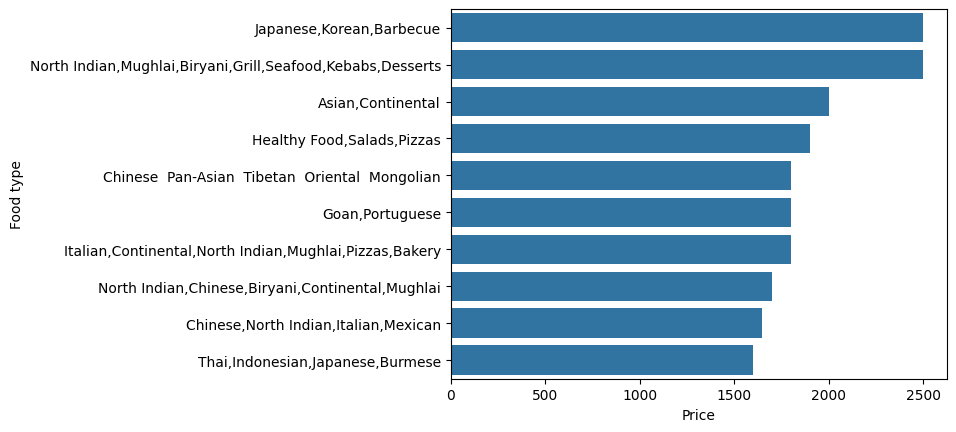

In [48]:
sns.barplot(data=dat2,x="Price",y="Food type")
plt.show()

In [ ]:
##Rating Distribution

In [19]:
Rating_dist=df.groupby("Restaurant")["Avg ratings"].mean().reset_index()
Rating_dist=Rating_dist.head(50)

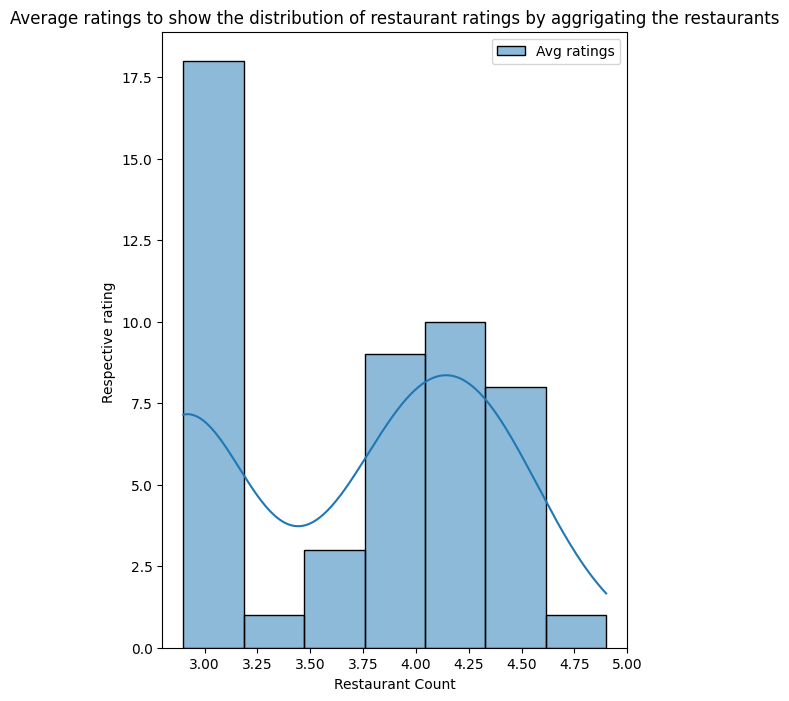

In [20]:
plt.figure(figsize=(6,8))
sns.histplot(data=Rating_dist,kde=True)
plt.xlabel("Restaurant Count")
plt.ylabel("Respective rating ")
plt.title("Average ratings to show the distribution of restaurant ratings by aggrigating the restaurants")
plt.show()

In [21]:
### Delivery Time Analysis:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [23]:
df[df["Avg ratings"]>4]["Delivery time"].mean()

np.float64(51.989083596667626)

In [24]:
###Top Rated Restaurants:

In [25]:
top_5=df.sort_values(by="Avg ratings",ascending=False).head()
top_5=top_5[["Restaurant","Food type","Avg ratings"]]
top_5

,Restaurant,Food type,Avg ratings
5424,Get In My Belly,Indian,5.0
5425,The Asian Pavilion,Asian Chinese,5.0
5519,Cafe Kokomo,"Beverages,Snacks,Desserts,Bakery",5.0
8571,Afresh,"Healthy Food,Salads,Desserts,Beverages",5.0
6297,Fat Tiger,"Pizzas,Chinese,Snacks,Beverages,American",5.0


# Hard Questions


In [26]:
### Correlation Analysis

In [27]:
df["Price"].corr(df["Avg ratings"])

np.float64(0.11363038630435676)

#### here the corelation coeficient is 0.1 which is slighlty positive and greater than 0 . so  here we can say that there is weak  positive relation between the price and the rating 

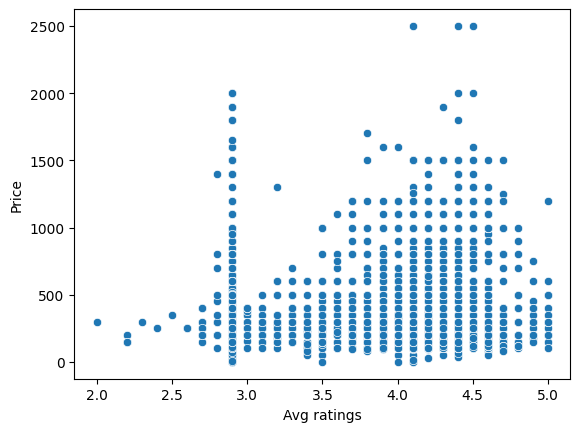

In [28]:
sns.scatterplot(x=df["Avg ratings"],y=df["Price"])
plt.show()


In [29]:
### Delivery Time Outliers

In [30]:
df["Restaurant"].value_counts()

Restaurant
La Pino'Z Pizza              13
Baskin Robbins               10
Nic Natural Ice Creams       10
Subway                       10
Kfc                           9
                             ..
Zaika The Bakers              1
Bangarpet Chats               1
Shree Ram Parotha House       1
Juice World Fresh N Juicy     1
Jay Arbuda Food Point         1
Name: count, Length: 7865, dtype: int64

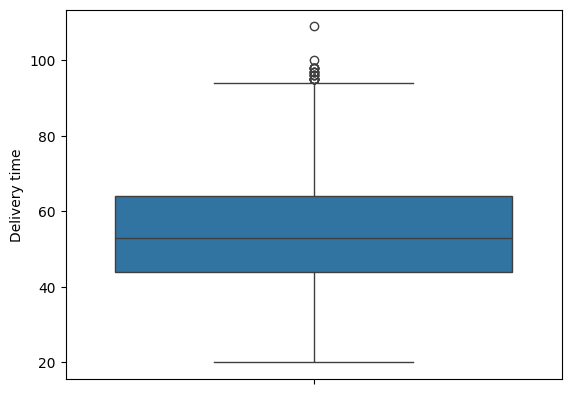

In [31]:
sns.boxplot(df["Delivery time"])
plt.show()

#### from this boxplot we can  say that the  mean delivery time is  50-55 minutes where the  delivery time above 95 min are consider to be outliers  whic are above the interquartile range   

In [32]:
### Price and Ratings Box Plot

### with forming the categories

In [33]:
def rating(rate):
    if rate <3:
        return "Below 3"
    elif rate >3 and rate <4:
        return "Between 3-4"
    else:
        return" Above 4"
df["Rating_category"]=df["Avg ratings"].apply(rating)
data_cat=df[["Rating_category","Avg ratings"]]

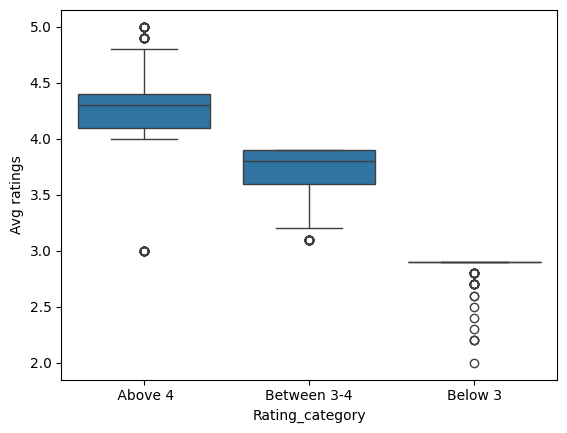

In [34]:
sns.boxplot(data=data_cat,y="Avg ratings",x="Rating_category")
plt.show()

### without formaing the  categories


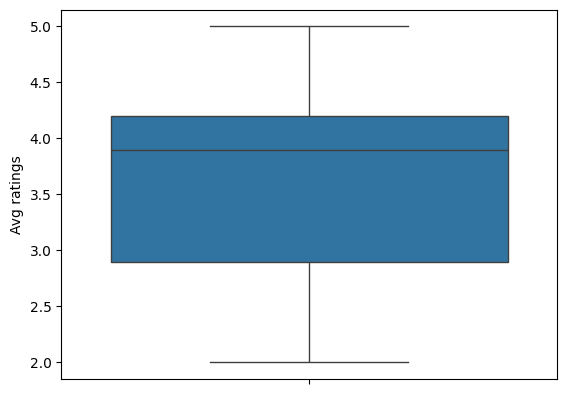

In [35]:
sns.boxplot(data=df["Avg ratings"])
plt.show()

In [36]:
### Group Analysis 

In [37]:
data_grouped=(df.groupby("City")[["Price","Avg ratings"]].mean())


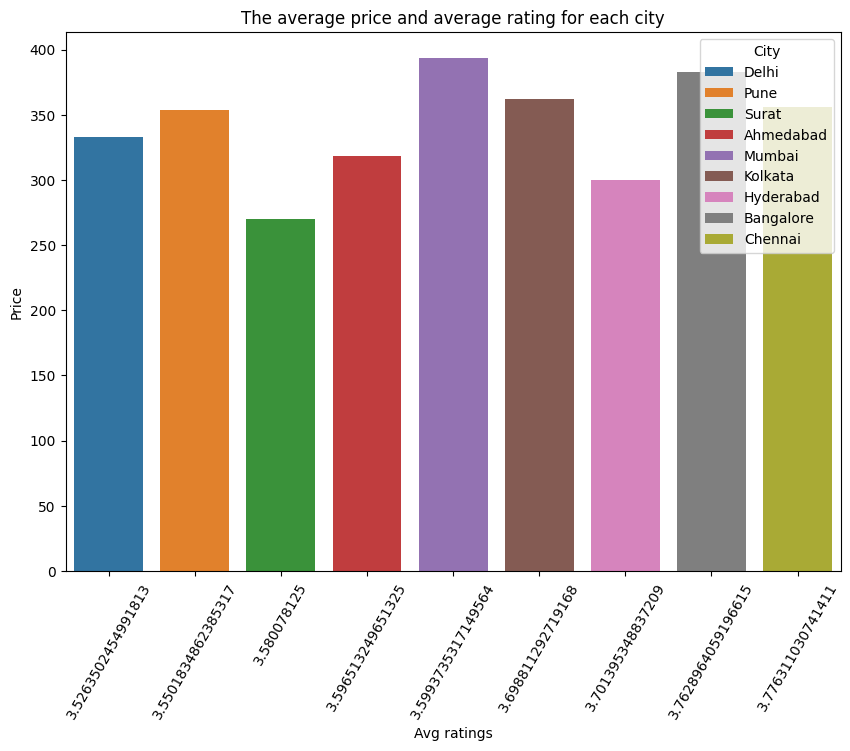

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(data=data_grouped,x="Avg ratings",y="Price",hue="City")
plt.xlabel("Avg ratings")
plt.xticks(rotation=60)
plt.ylabel("Price")
plt.title("The average price and average rating for each city")
plt.show()